In [1]:
from tdc.single_pred import Tox
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tdc.utils import retrieve_label_name_list

In [2]:
# First, check available toxicity endpoints
label_names = retrieve_label_name_list('Tox21')
print("Available toxicity endpoints:")
print(label_names)

Available toxicity endpoints:
['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']


In [ ]:
# Then initialize with a specific endpoint
data = Tox(name='Tox21', label_name='NR-AR')  # Example using the androgen receptor assay

Found local copy...
Loading...
Done!


In [4]:
df = data.get_data()
print(df.head())

    Drug_ID                                  Drug    Y
0   TOX3021          CCOc1ccc2nc(S(N)(=O)=O)sc2c1  0.0
1   TOX3020             CCN1C(=O)NC(c2ccccc2)C1=O  0.0
2   TOX3027       CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C  0.0
3  TOX20800             CC(O)(P(=O)(O)O)P(=O)(O)O  0.0
4   TOX5110  CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C  0.0


In [12]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (7265, 3)


In [13]:
print(df.dtypes) 

Drug_ID     object
Drug        object
Y          float64
dtype: object


In [14]:
# Display basic info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7265 entries, 0 to 7264
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Drug_ID  7265 non-null   object 
 1   Drug     7265 non-null   object 
 2   Y        7265 non-null   float64
dtypes: float64(1), object(2)
memory usage: 170.4+ KB
None


In [15]:
print(f"\nDuplicate Rows: {df.duplicated().sum()}")


Duplicate Rows: 0


In [16]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 Y
count  7265.000000
mean      0.042533
std       0.201815
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [17]:
# Count missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


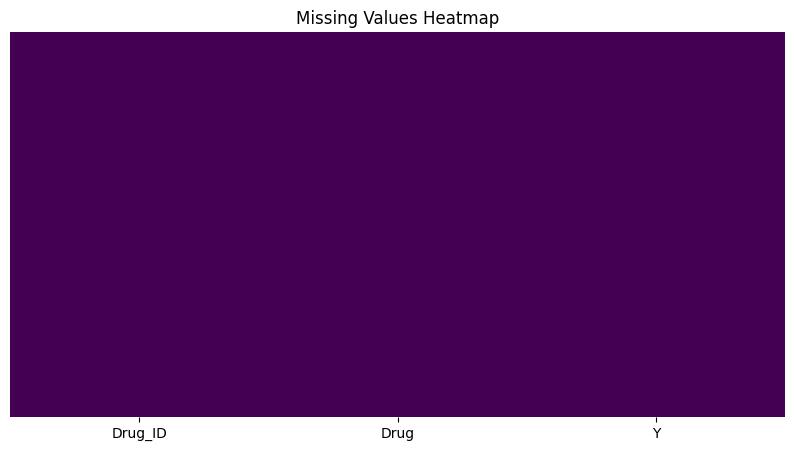

In [18]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

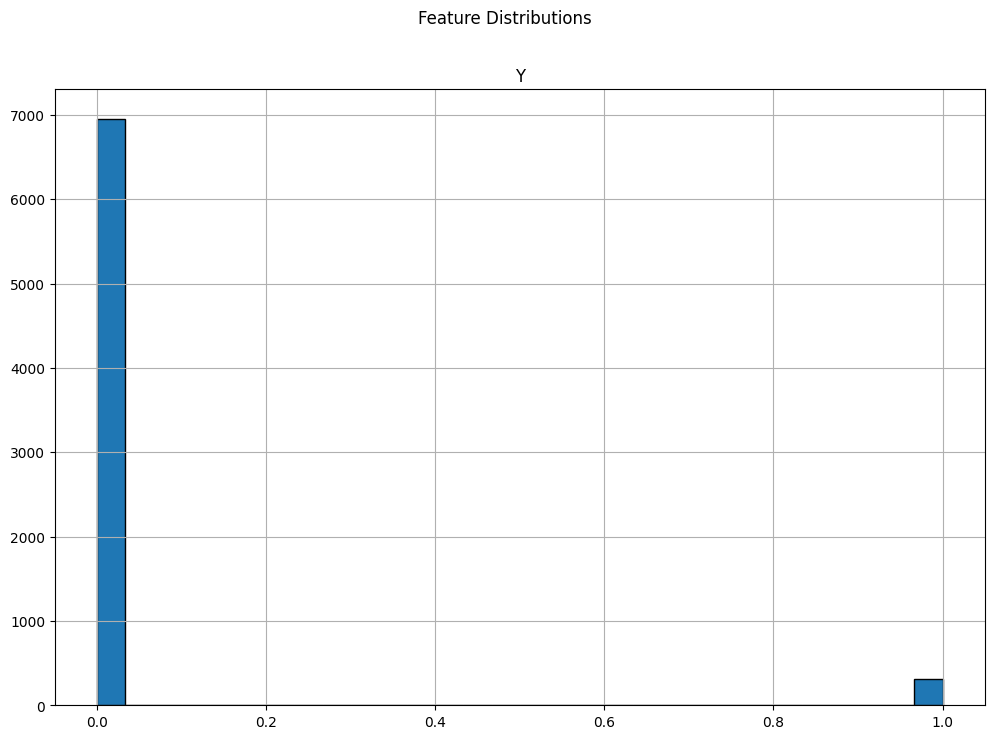

In [20]:
# Feature distribution (histograms)
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

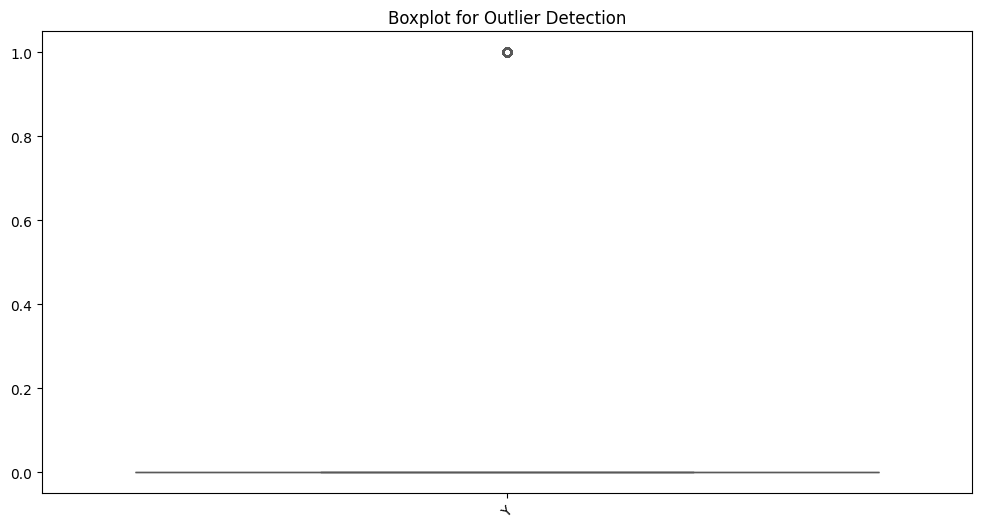

EDA Completed Successfully!


In [22]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Pairplot to visualize feature relationships
# Uncomment for small datasets (can be slow for large data)
# sns.pairplot(combined_df, hue="assay", diag_kind="kde", palette="husl")
# plt.show()

print("EDA Completed Successfully!")

In [5]:
# Get pre-defined train/validation/test splits
split = data.get_split(method = 'random', seed = 42, frac = [0.7, 0.1, 0.2])  
train_data = split['train']
valid_data = split['valid']
test_data = split['test']


In [ ]:
# df.to_parquet('../data/tox21_NR-AR.parquet', index=False)

Text(0.5, 1.0, 'Class Distribution Across Splits')

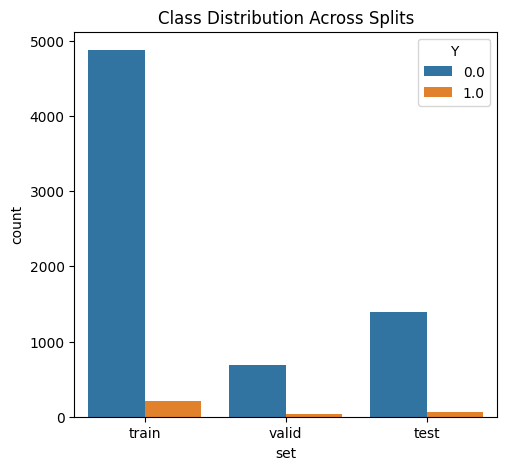

In [24]:
# Combine split data for comparison
train_data['set'] = 'train'
valid_data['set'] = 'valid'
test_data['set'] = 'test'
combined_splits = pd.concat([train_data, valid_data, test_data])

# Plot distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='set', hue='Y', data=combined_splits)
plt.title('Class Distribution Across Splits')

# plt.subplot(1, 2, 2)
# sns.boxplot(x='set', y='mol_wt', data=combined_splits)
# plt.title('Molecular Weight Distribution Across Splits')
# plt.tight_layout()
# plt.show()